Part_1

In [107]:
import pandas as pd

In [108]:
data = pd.read_csv('coins_data.xlsx - Sheet1.csv')
data

,Symbol,Volume,MarketCap,TotalSupply,ProofType,Network
0,LEO,1.823284e+06,3586504072,"985,239,504",PoS,Ethereum
1,UNI,9.918768e+07,3992451215,"1,000,000,000",PoS,Ethereum
2,WBTC,1.415410e+08,4237575489,"163,106",PoW,Ethereum
3,AVAX,2.197065e+08,4901630273,"431,804,080",PoS,Avalanche
4,DAI,2.177113e+08,5513660644,"5,347,888,596",stablecoin,Ethereum
5,SHIB,2.479944e+08,5606251419,"589,589,040,239,380",PoS,Ethereum
6,LTC,5.913019e+08,5729295460,"84,000,000",PoW,Litecoin
7,TRX,2.719028e+08,6018922345,"88,996,805,683",PoS,Tron
8,DOT,2.035592e+08,6659549868,"1,364,182,225",PoW,Polkadot
9,MATIC,4.232990e+08,8053184610,"10,000,000,000",PoS,Polygon


In [109]:
from sklearn.preprocessing import StandardScaler
subset_data = data[['Volume', 'MarketCap']]
subset_data = StandardScaler().fit_transform(subset_data)
subset_data

array([[-0.47164572, -0.41411995],
       [-0.4601297 , -0.41021383],
       [-0.45512025, -0.40785519],
       [-0.44587503, -0.4014655 ],
       [-0.44611101, -0.3955764 ],
       [-0.4425292 , -0.39468547],
       [-0.40192363, -0.39350151],
       [-0.43970138, -0.39071465],
       [-0.44778489, -0.38455039],
       [-0.4217946 , -0.37114051],
       [-0.39688566, -0.36828455],
       [-0.39721057, -0.34911321],
       [-0.42871377, -0.33211319],
       [ 0.12950864, -0.33188364],
       [-0.31227828, -0.22172191],
       [-0.03828817, -0.0895533 ],
       [-0.39133841, -0.01948183],
       [ 3.44897798,  0.26907471],
       [ 0.57414873,  1.43812015],
       [ 2.2446949 ,  3.96878013]])

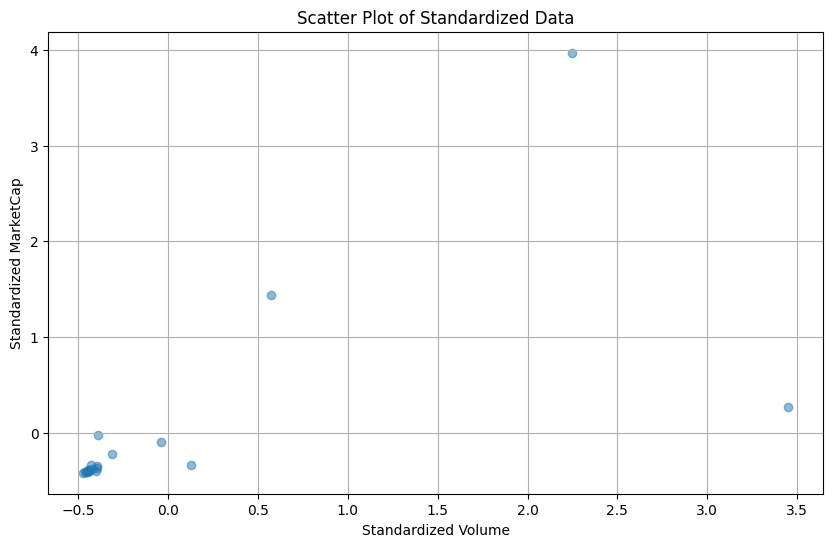

In [110]:
import matplotlib.pyplot as plt

subset_data = pd.DataFrame(subset_data, columns=['Volume', 'MarketCap'])

plt.figure(figsize=(10, 6))
plt.scatter(subset_data['Volume'], subset_data['MarketCap'], alpha=0.5)
plt.xlabel('Standardized Volume')
plt.ylabel('Standardized MarketCap')
plt.title('Scatter Plot of Standardized Data')
plt.grid(True)
plt.show()

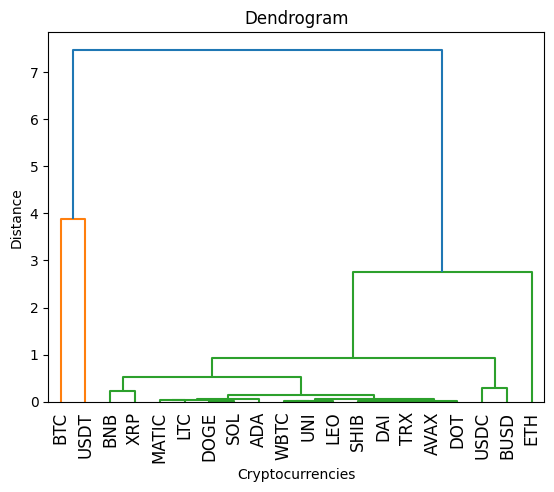

In [111]:
from scipy.cluster import hierarchy as shc

linkage_matrix = shc.linkage(subset_data, method='ward')

shc.dendrogram(linkage_matrix, orientation='top', labels=data['Symbol'].values, distance_sort='descending')
plt.title('Dendrogram')
plt.xlabel('Cryptocurrencies')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()

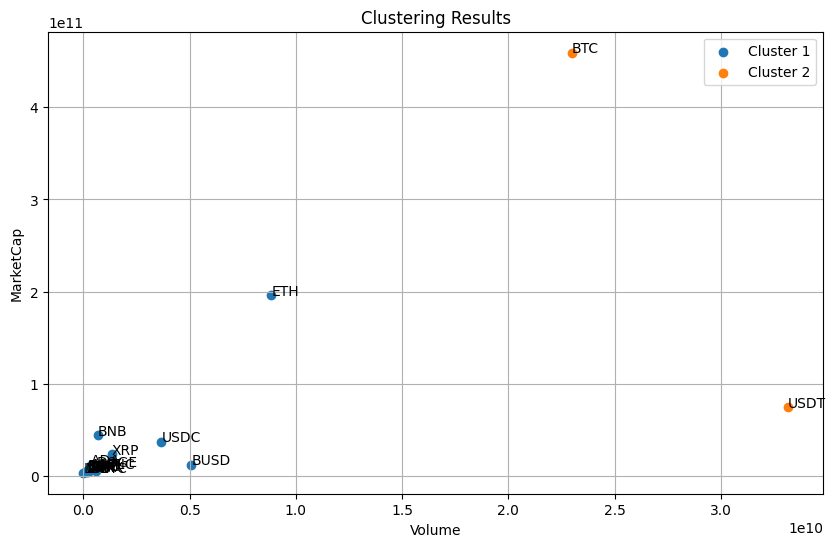

In [122]:
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(linkage_matrix, t=2, criterion='maxclust')
data_copy = data
data_copy['Clusters'] = clusters

plt.figure(figsize=(10, 6))
for i in range(1, 3):
    cluster = data_copy[data_copy['Clusters'] == i]
    plt.scatter(cluster['Volume'], cluster['MarketCap'], label=f'Cluster {i}')
    for index, row in cluster.iterrows():
        plt.annotate(row['Symbol'], (row['Volume'], row['MarketCap']))

plt.xlabel('Volume')
plt.ylabel('MarketCap')
plt.title('Clustering Results')
plt.legend()
plt.grid(True)
plt.show()


Part_2

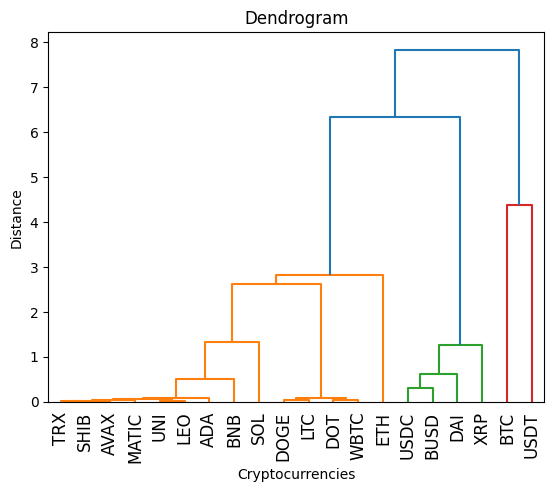

In [117]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data_copy = data
data_copy['ProoftypeEncoded'] = label_encoder.fit_transform(data['ProofType'])
sub_data = pd.concat([subset_data, data_copy['ProoftypeEncoded']], axis=1)

result = shc.linkage(sub_data, method='ward')
shc.dendrogram(result, orientation='top', labels=data_copy['Symbol'].values, distance_sort='descending')
plt.title('Dendrogram')
plt.xlabel('Cryptocurrencies')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()

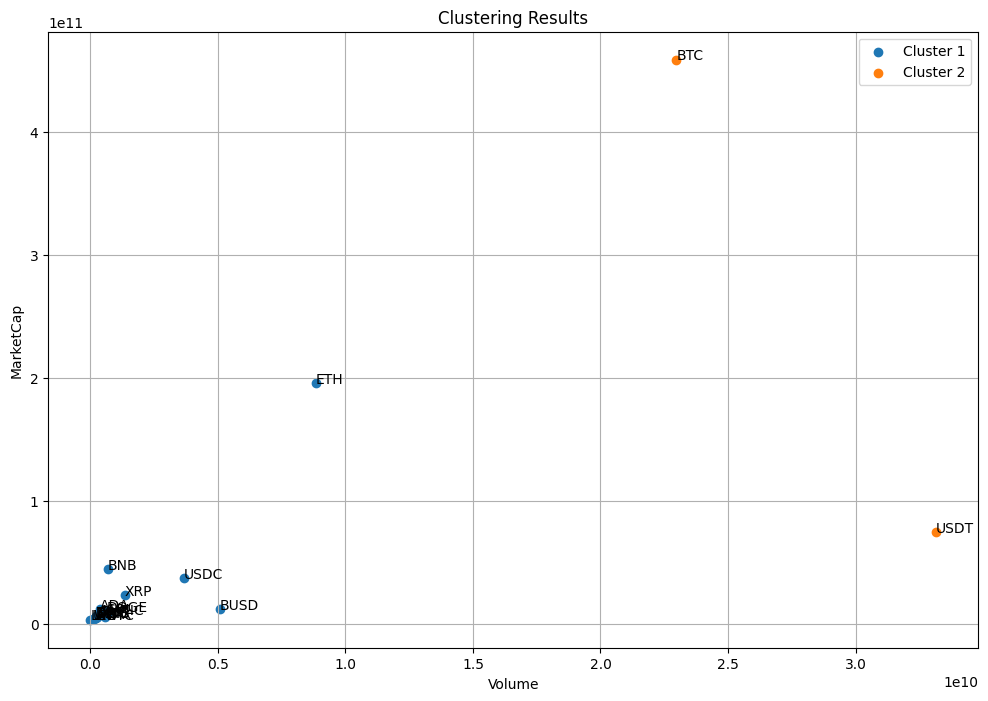

In [121]:
clusters = fcluster(result, t=2, criterion='maxclust')
data_copy['Cluster'] = clusters

plt.figure(figsize=(12, 8))
for i in range(1, 3):
    cluster = data_copy[data_copy['Clusters'] == i]
    plt.scatter(cluster['Volume'], cluster['MarketCap'], label=f'Cluster {i}')
    for index, row in cluster.iterrows():
        plt.annotate(row['Symbol'], (row['Volume'], row['MarketCap']))

plt.xlabel('Volume')
plt.ylabel('MarketCap')
plt.title('Clustering Results')
plt.legend()
plt.grid(True)
plt.show()